### SIMPLE LINEAR REGRESSION

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import ML library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from seaborn import countplot


In [3]:
Student_score=pd.read_csv("C:/Users/Charumathi/Desktop/student_scores.csv")
Student_score

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
Student_score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
Student_score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


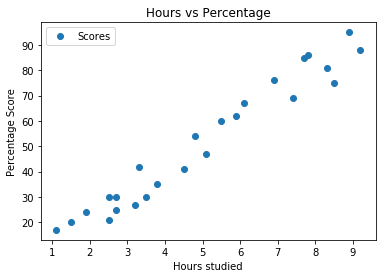

In [8]:
Student_score.plot(x='Hours',y="Scores",style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.show()



In [4]:
Student_score.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
X=Student_score.iloc[:, :-1].values
Y=Student_score.iloc[:,1].values

In [6]:
#Spliting the data into Training and Testing set
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.25,random_state=0)

In [7]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
Y_pred = regressor.predict(X_test)
Y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [28]:
print(regressor.intercept_)

1.932204253151646


In [13]:
print(regressor.coef_)

[9.94167834]


In [14]:
Y_pred=regressor.predict(X_test)

In [15]:
df=pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


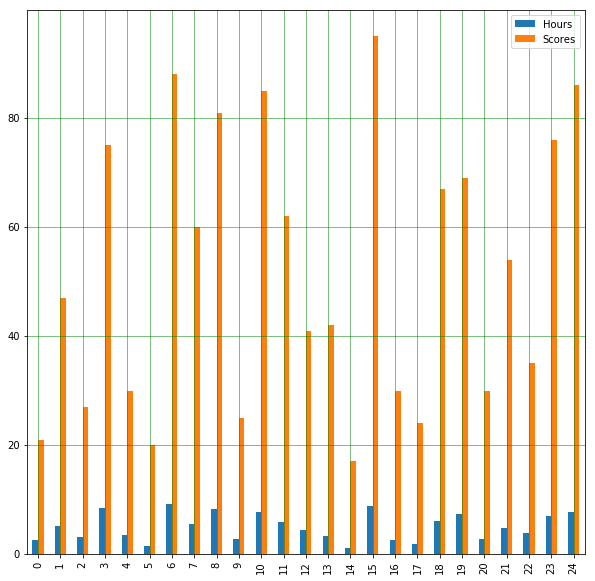

In [16]:
Student_score.plot(kind='bar',figsize=(10,10))
plt.grid(which='major',linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5', color='black')

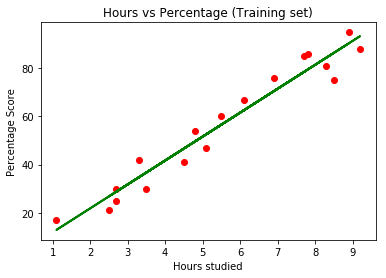

In [17]:
#Student_score.plot(x='Hours',y="Scores",style='o')
plt.title("Hours vs Percentage (Training set)")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='green', linewidth=2)
plt.show()

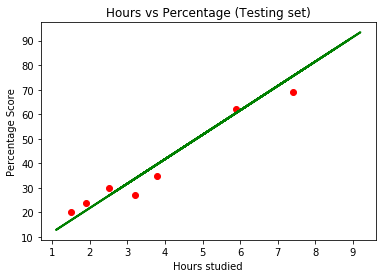

In [18]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='green', linewidth=2)
#Student_score.plot(x='Hours',y="Scores",style='o')
plt.title("Hours vs Percentage (Testing set)")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.show()

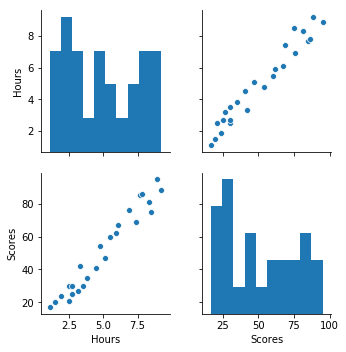

In [19]:
Score=Student_score.head()
Score
#sns.set_style("whitegrid")
#sns.boxplot(x='Hours',y='Scores',data=Score)
sns.pairplot(Student_score)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED1057E518>,
      dtype=object)

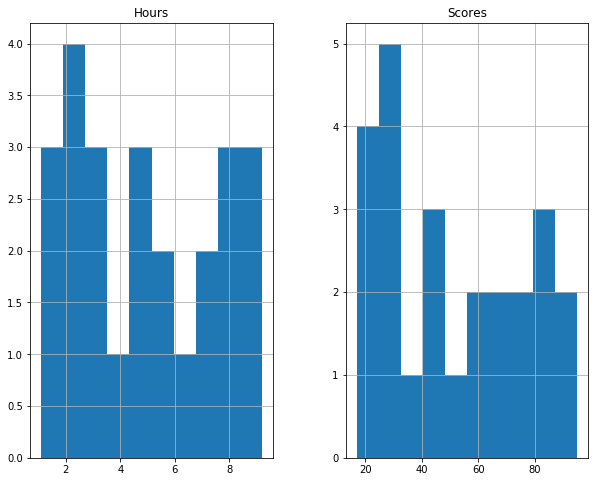

In [20]:
Student_score.hist(bins=10,figsize=(10,8))

Text(0.5,1,'Countplot for Hours')

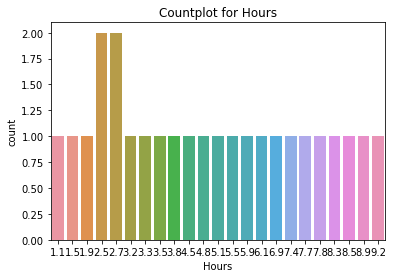

In [21]:
sns.countplot(x = 'Hours', data= Student_score).set_title('Countplot for Hours')

Text(0.5,1,'Countplot for Scores')

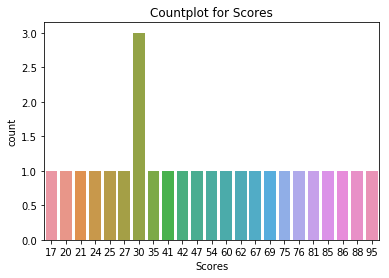

In [22]:
#Countplot for Scores
sns.countplot(x='Scores',data=Student_score).set_title('Countplot for Scores')

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj,

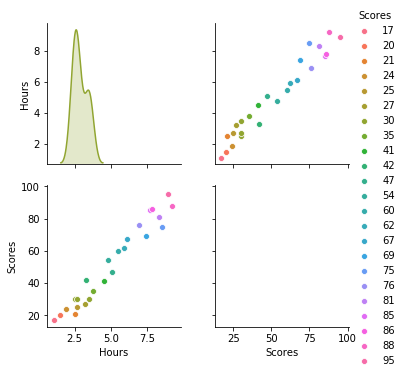

In [24]:
sns.pairplot(Student_score,hue='Scores')
plt.show()

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055
